---
Projet Déconvolution
====================


**Projet présenté par:**

**Victoria BOUCHET/Vahé TILDIAN/ Alexandre ROMANO/ Lucas PETIT**

---

# Question 1

Soit $F:t\mapsto \cos(2\pi\omega_0 t)e^{-\frac{(t-0.5)^2}{2\sigma^2}}$ o\`u $\omega_0$ est un entier et $t$ varie dans $[0,1]$, et $\sigma\in\mathbb{R}_+^*$.

On prend dans ce qui suit $\omega_0=20$ et $\sigma=0.1$. 

1. Tracer une représentation graphique de la fonction $F$

Modules PlotLib, Pandas et Numpy bien importés


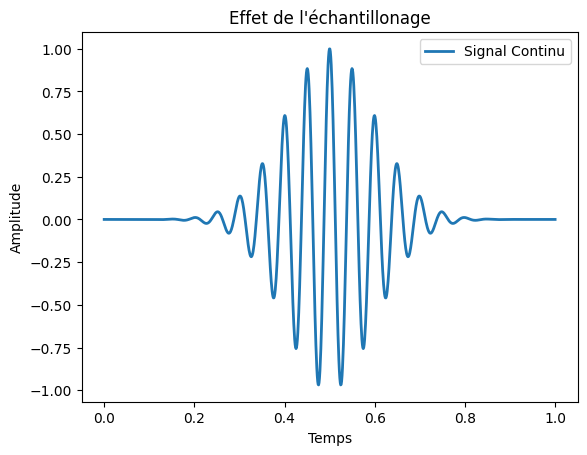

In [ ]:
#coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Valeurs utilisées
w0 = 20
sigma = 0.1

def f(t):
    "Fonction F à représenter"
    return(np.cos(2*np.pi*t*w0))*np.exp(-(np.power(t-0.5,2))/(2*np.power(sigma,2)))

def graph():
    "Représentation graphique de la fonction"
    t= np.linspace(0, 1, 1000) #1000 pour affiner au maximum le graphique
    y = f(t)
    plt.plot(t, y, label="Signal Continu", linewidth=2)
    plt.legend()
    plt.title("Effet de l'échantillonage")
    plt.xlabel("Temps")
    plt.ylabel("Amplitude")

# MAIN
graph()


2. Superposer sur la première figure le tracé des points $(t_n,u_n)$ en les reliant par des segments de droite en choisissant une première valeur de $f_s$.

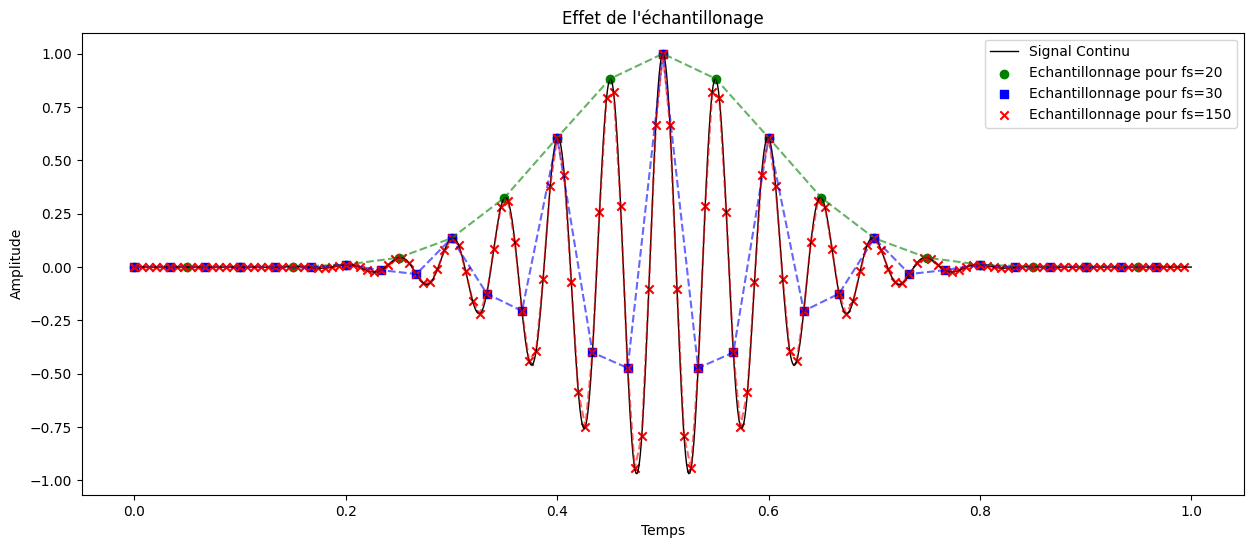

In [ ]:
# Affichage de l'échantillonage
def sampling(fs, color, mark):
    T = 1/fs # Définition des périodes d'échantillonages
    t_sample = np.arange(0, 1, T)
    y_sample = f(t_sample)

    "code pour l'affichage"
    plt.scatter(t_sample, y_sample, color=color, label=f"Echantillonnage pour fs={fs}", marker=mark)
    plt.plot(t_sample, y_sample, color=color, linestyle='dashed', alpha=0.6)
    plt.legend()


# MAIN
graph()
# Choix de trois valeurs dont deux en dessous de W0 
sampling(fs=20, color='green', mark='o')
sampling(fs=30, color='blue', mark='s') # Valeur egale à 2W0
sampling(fs=150, color='red', mark='x') # Valeur au dessus de 2w0

3.Tracer le même type de figure pour une deuxième valeur de $f_s$, puis une troisième.

Que constatez vous si $f_s\ll 2\omega_0$ ?

- si $f_s\ll 2\omega_0$, on remarque que la fréquence du signal échantilloné est plus basse que le signal d'origine.
  Or, lorsque la fréquence baisse ainsi, cela peut aboutir à une perte d'information rendant la récupération du signal plus compliquée et donc dégradation de ce signal

- Au final on constate qu'un $f_s$ plus bas que $2\omega_0$ entraine un signal dégradé qui l'est de plus en plus, plus on s'en éloigne.
- **fs1 = 150 = fidèle, fs2 = 30 = début de dégradation, fs3 = 20 = dégradé**

# Question 2

1. Télécharger les données sur la page Ametice (fichiers **y.wav**, **y-original.wav** et **h.txt**)
2. Transformer les données en vecteurs de type Numpy et les visualiser.

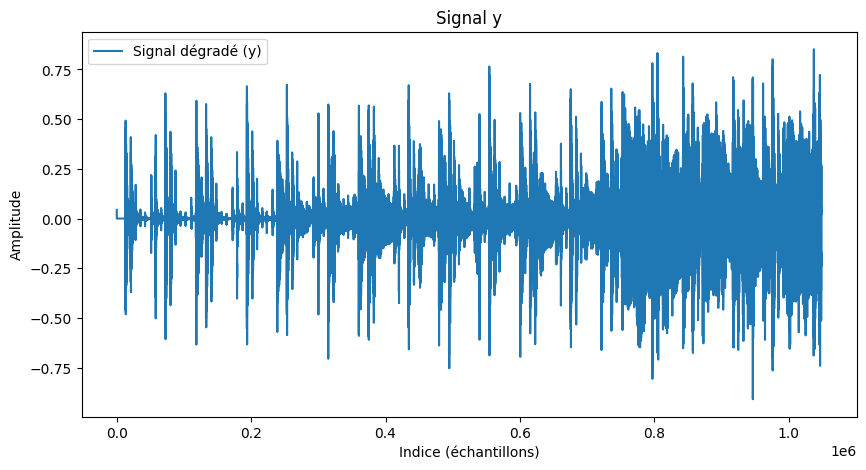

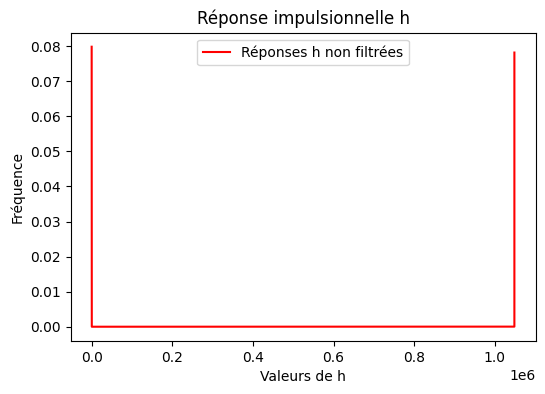

In [ ]:
import scipy.io
from scipy.io import wavfile

def lecture_y():
    "Lecture du fichier dégradé et affichage de la fréquence d'échantillonnage + données"
    echantillonage_y, y = wavfile.read("y.wav") 
    return echantillonage_y, y

def affichage_y():
    "Test affichage"
    print("Fréquence d'échantillonage :", echantillonage_y)
    print("Taille des données :", len(y))

def graph_y():
    "Affichage graphique du signal y dégradé"
    echantillonage_y, y = lecture_y()
    h = lecture_h()
    #Test d'affichage des deux fichiers 
    plt.figure(figsize=(10, 5))
    plt.plot(y, label="Signal dégradé (y)")
    plt.xlabel("Indice (échantillons)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.title("Signal y")
    plt.show()


def lecture_h():
    "Lecture du fichier texte h correspondant à la réponse impulsionnelle"
    return np.loadtxt("h.txt")

def affichage_h():
    "Test d'affichage des première lignes de h et de la longueur du fichier " 
    h = lecture_h()
    print("Longueur du fichier :", len(h))
    print("Première lignes :", h[:10])
    print("Type de h :", type(h))
    
def graph_h():
    "Affichage graphique de la réponse impulsionnelle h"
    h = lecture_h()
    #h_filtre = filtrer_h(h)  # Applique le filtrage
    t = np.arange(len(h))  # Nouvelle échelle pour le graphique
    plt.figure(figsize=(6, 4))
    plt.plot(t, h, label="Réponses h non filtrées", color="red")
    plt.xlabel("Valeurs de h")
    plt.ylabel("Fréquence")
    plt.title("Réponse impulsionnelle h")
    plt.legend()
    plt.show()


# MAIN
graph_y()
graph_h()

# Question 3

L'objectif de cette question est de construire une intuition pour comprendre l'effet sur un signal $x$ d'un opérateur du type $\mathcal{H}$. On pourra s'en servir le cas échéant pour comprendre l'effet sur le son original de l'opérateur qui a donné $y$.


           
Modéliser l'effet de l'opérateur $Id-\mathcal{S}^{(n)}$  sur un signal $x$.
       

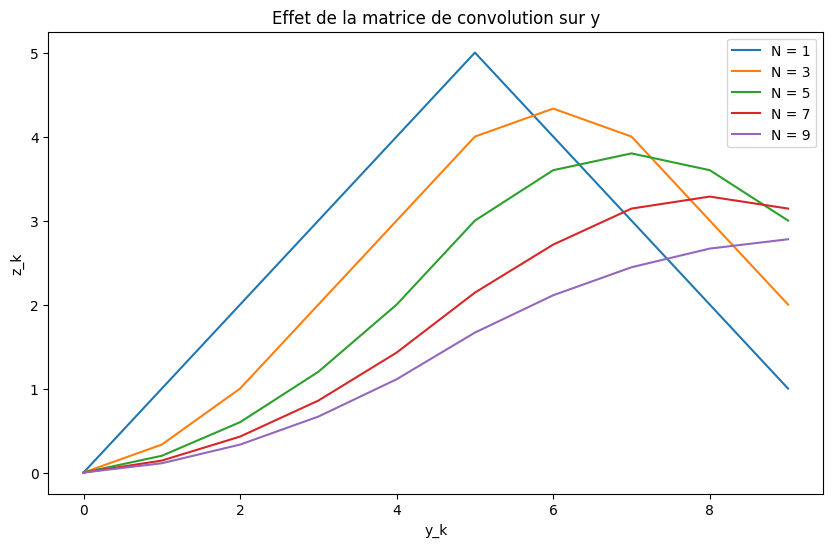

In [ ]:
#Méthode possible dans la fonction convolve2d() en python (C compilé) mais utilisé surtout pour le traitement d'images
def matrice_convolution(m, N):
    "Creation d'une matrice de convolution en fonction de N"
    H = np.zeros((N, N))
    # Creation du vecteur h en fonction de N pour test de différentes situations
    filtre_h = np.array([1/m]*m + [0] * (N-m))

    # Matrice de convolution
    for i in range(N):
        for j in range(min(m, N)):  
            if i - j >= 0:  
                H[i, i - j] = filtre_h[j]
    return H

def fonction_y(N):
    "Calcul de Yk en fonction de k"
    return np.array([k if k < N/2 else N-k for k in range(N)])

def fonction_z(y, n):
    "Calcul de z en fonction de yk et S(n)"
    plt.figure(figsize=(10,6))
    
    N = len(y)
    for i, n in enumerate(n):
        S_n = matrice_convolution(n, N)
        z = S_n @ y
        plt.plot(range(N), z, label=f"N = {n}")

    plt.title("Effet de la matrice de convolution sur y")
    plt.xlabel("y_k")
    plt.ylabel("z_k")
    plt.legend()
    plt.show()

# MAIN
N = 10
m = np.arange(1, 11, 2)

y_k = fonction_y(N)
z_k = fonction_z(y_k, m)





# Question 4

Mettre en évidence expérimentalement la différence de temps de calcul entre le calcul naïf de $\hat y$ et son calcul à l'aide des fonctions $fft/ifft$ de Numpy.

Détailler l'algorithme de la transformée de Fourier rapide.

In [ ]:


import time
import numpy.fft as npft

def dft_naif(y):
    N = len(y)
    Y = np.zeros(N, dtype=complex) #Précision du type pour stockage

    for k in range(N):
        for n in range (N):
            Y[k] += y[n] * np.exp((-2j * np.pi*k*n)/N)
    return Y

def time_comparaison(d1, d2):
    return abs(d1 - d2) 

# MAIN
N = 1024
y = fonction_y(N)

#Calcul du temps pour la DFT naïve
debut_dft = time.time()
y_naif = dft_naif(y)
fin_dft = time.time()

temps_tot = fin_dft-debut_dft

#Calcul du temps pour la FFT
debut_fft = time.perf_counter();
ychap = npft.fft(y)
fin_fft = time.perf_counter()

tempsfft_tot = fin_fft - debut_fft
res_tot = time_comparaison(temps_tot, tempsfft_tot)

# Affichage console des temps obtenus
print(f"Durée du calcul naïf : {temps_tot:.4f} s")
print(f"Durée du calcul par FFT  : {tempsfft_tot:.4f} s")
print(f"Delta (différence entre naïf et FFT) : {res_tot:.4f} s",)

Durée du calcul naïf : 2.7091 s
Durée du calcul par FFT  : 0.0015 s
Delta (différence entre naïf et FFT) : 2.7076 s


# Question 5

1. Restaurer avec Python le son $y=Hx$ pour obtenir $u=x$.

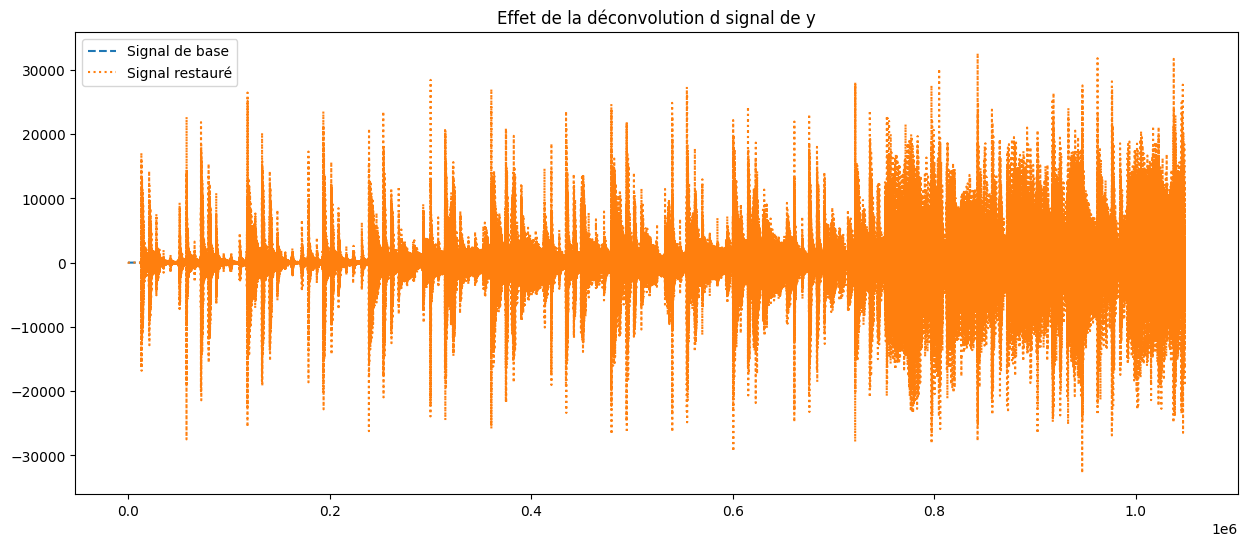

In [ ]:
# Chargement de h et y
fs, y = lecture_y()
h = lecture_h()

# Rechargement de la taille de h
N = len(h)

# Passage en domaine fréquentiel 
D = npft.fft(h)
ychap = npft.fft(y)

# Déconvolution
e = 1e-6 # Supprimer la division par zéro
xchap = ychap/(D+e)

# Retour au domaine temporel
u = npft.ifft(xchap).real
new_u = (u/np.max(np.abs(u))*32767).astype('int16')

# Affichage graphique
plt.figure(figsize=(15,6))
plt.plot(y, label="Signal de base", linestyle="dashed")

plt.plot(new_u, label="Signal restauré", linestyle="dotted")
plt.legend()
plt.title("Effet de la déconvolution d signal de y")
plt.show()

2. Commenter l'effet que le filtre a sur le son $u$ à l'oreille. Décrire une situation concrète dans laquelle ce type de filtre pourrait être utilisé. 

In [12]:
# Enregistrement du son restauré avec wavfile avec passage en 16b
wavfile.write("u_restaure.wav", fs, new_u)

Le son y a été restauré et sauvegardé dans un fichier.wav "u.wav". A l'oreille déjà le son est clair et sans effet de bruit en fond. Les plus hautes fréqences semblent être restaurées. Nous pouvons aussi entendre plus d'écho dans le fond et le bruit n'est pas trop perceptible. Une manière d'utiliser ce genre de filtre serait sur des fichiers audios dégradés. Or des fichiers audios degradés, il est possible d'en retrouver notamment sur de vieilles archives audios/cassettes/CD, où le micro était sûrement de moins bonne qualité qu'ajourd'hui et dont l'enregistrement a pu être déterioré avec le temps.